In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
from datetime import timedelta

from scipy import stats
import statsmodels.api as sm

# Estimated Occupancy
## Load raw estimated occupancy

In [2]:
PB_occupancy = pd.read_csv('./cleaned_occupancy_data/PB_occupancy.csv')
PLA_occupancy = pd.read_csv('./cleaned_occupancy_data/PLA_occupancy.csv')
SARA_occupancy = pd.read_csv('./cleaned_occupancy_data/SARA_occupancy.csv')
ACRA_occupancy = pd.read_csv('./cleaned_occupancy_data/ACRA_occupancy.csv')


## Sparse data
In raw estimated occupancy data, each data entry corresponds to around 111ms.

In [3]:
def sparse_estimated_occupancy(PB_occupancy, avg_point=600):
    point_num = int(np.ceil(len(PB_occupancy["Occupancy"])/avg_point))
    point_avg = []
    for i in range(point_num):
        if i == point_num:
            point_avg.append(PB_occupancy["Occupancy"][i*avg_point:].mean())
        else:
            point_avg.append(PB_occupancy["Occupancy"][i*avg_point: (i+1)*avg_point].mean())
    return np.array(point_avg)

avg_point=540 # 540 corresponds to 1 minute

point_avg_PB = sparse_estimated_occupancy(PB_occupancy, avg_point)
point_avg_PLA = sparse_estimated_occupancy(PLA_occupancy, avg_point)
point_avg_SARA = sparse_estimated_occupancy(SARA_occupancy, avg_point)
point_avg_ACRA = sparse_estimated_occupancy(ACRA_occupancy, avg_point)

sparsed_estimated_occupancy = {'PB': point_avg_PB, 'PLA': point_avg_PLA, 'SARA': point_avg_SARA, 'ACRA': point_avg_ACRA}
for i in sparsed_estimated_occupancy.keys():
    print('len of {}: {}'.format(i, len(sparsed_estimated_occupancy[i])))

len of PB: 648
len of PLA: 740
len of SARA: 203
len of ACRA: 179


In [4]:
print("point_avg_PB  : mean={0:.4f},   std = {1:.4f}".format(point_avg_PB.mean(),point_avg_PB.std()))
print("point_avg_PLA : mean={0:.4f},   std = {1:.4f}".format(point_avg_PLA.mean(),point_avg_PLA.std()))
print("point_avg_SARA: mean={0:.4f},   std = {1:.4f}".format(point_avg_SARA.mean(),point_avg_SARA.std()))
print("point_avg_ACRA: mean={0:.4f},   std = {1:.4f}".format(point_avg_ACRA.mean(),point_avg_ACRA.std()))

point_avg_PB  : mean=2.9623,   std = 2.3252
point_avg_PLA : mean=3.0709,   std = 2.6112
point_avg_SARA: mean=4.8023,   std = 3.3077
point_avg_ACRA: mean=2.2685,   std = 1.3781


## 1-way ANOVA
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [5]:
f_value, p_value = stats.f_oneway(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=38.1896, p_value=0.0000


In [6]:
f_value, p_value = stats.f_oneway(point_avg_PB, point_avg_PLA)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=0.6596, p_value=0.4168


## Kruskal-Wallis H-test for independent samples
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal

In [7]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=76.2323, p_value=0.0000


In [8]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(point_avg_PB, point_avg_PLA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=0.0096, p_value=0.9220


## T-test
standard student test

In [9]:
t_PB_PLA, p_PB_PLA = stats.ttest_ind(point_avg_PB, point_avg_PLA)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(point_avg_PB, point_avg_SARA)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(point_avg_PB, point_avg_ACRA)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(point_avg_PLA, point_avg_SARA)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(point_avg_PLA, point_avg_ACRA)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(point_avg_SARA, point_avg_ACRA)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-0.8122, p_PB_PLA=0.4168
t_PB_SARA=-8.8100, p_PB_SARA=0.0000
t_PB_ACRA=3.8070, p_PB_ACRA=0.0002
t_PLA_SARA=-7.8640, p_PLA_SARA=0.0000
t_PLA_ACRA=3.9748, p_PLA_ACRA=0.0001
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


Welch’s t-test

In [10]:
t_PB_PLA, p_PB_PLA = stats.ttest_ind(point_avg_PB, point_avg_PLA, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(point_avg_PB, point_avg_SARA, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(point_avg_PB, point_avg_ACRA, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(point_avg_PLA, point_avg_SARA, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(point_avg_PLA, point_avg_ACRA, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(point_avg_SARA, point_avg_ACRA, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))

t_PB_PLA=-0.8184, p_PB_PLA=0.4133
t_PB_SARA=-7.3588, p_PB_SARA=0.0000
t_PB_ACRA=5.0302, p_PB_ACRA=0.0000
t_PLA_SARA=-6.8771, p_PLA_SARA=0.0000
t_PLA_ACRA=5.6883, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


## Plot sparsed estimate occupancy

<IPython.core.display.Javascript object>


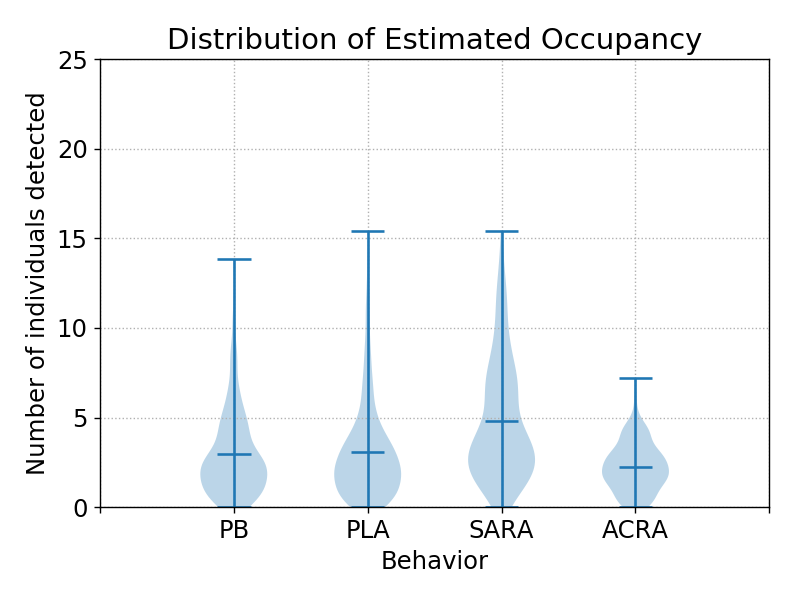

In [11]:
estimated_occupancy = [point_avg_PB, point_avg_PLA, 
                       point_avg_SARA, point_avg_ACRA]

plt.figure()
plt.rcParams.update({'font.size': 14})
plt.violinplot(estimated_occupancy, showmeans=True, showmedians=False)
plt.xticks(np.arange(0,6), ['','PB', 'PLA', 'SARA', 'ACRA'])
plt.ylim(0,25)
plt.ylabel('Number of individuals detected')
plt.xlabel('Behavior')
plt.title('Distribution of Estimated Occupancy')
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Distribution_of_Estimated_Occupancy_sparsed_data_point.png', dpi=300)


len_PB=648, len_PLA=740, len_SARA=203, len_ACRA=179


<IPython.core.display.Javascript object>


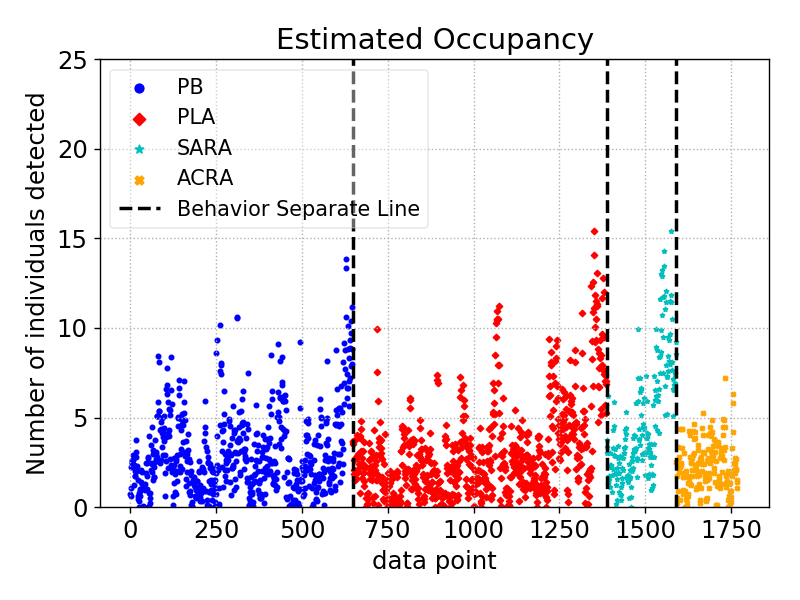

In [12]:
len_PB = len(point_avg_PB)
len_PLA = len(point_avg_PLA)
len_SARA = len(point_avg_SARA)
len_ACRA = len(point_avg_ACRA)
print('len_PB={}, len_PLA={}, len_SARA={}, len_ACRA={}'.format(len_PB, len_PLA, len_SARA, len_ACRA))

plt.figure()

handle_PB = plt.scatter(range(len_PB), point_avg_PB, c='b', marker='o', s = 6)
handle_PLA = plt.scatter(range(len_PB,len_PB+len_PLA), point_avg_PLA, c='r', marker='D', s = 6)
handle_SARA = plt.scatter(range(len_PB+len_PLA,len_PB+len_PLA+len_SARA), point_avg_SARA, c='c', marker='*', s = 6)
handle_ACRA = plt.scatter(range(len_PB+len_PLA+len_SARA,len_PB+len_PLA+len_SARA+len_ACRA), point_avg_ACRA, c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=len_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=len_PB+len_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=len_PB+len_PLA+len_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of individuals detected')
plt.xlabel('data point')

plt.ylim(0,25)
plt.title('Estimated Occupancy')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Estimated_occupancy_comparison_sparsed_data_point.png', dpi=300)

## Quantile Plot 

<IPython.core.display.Javascript object>


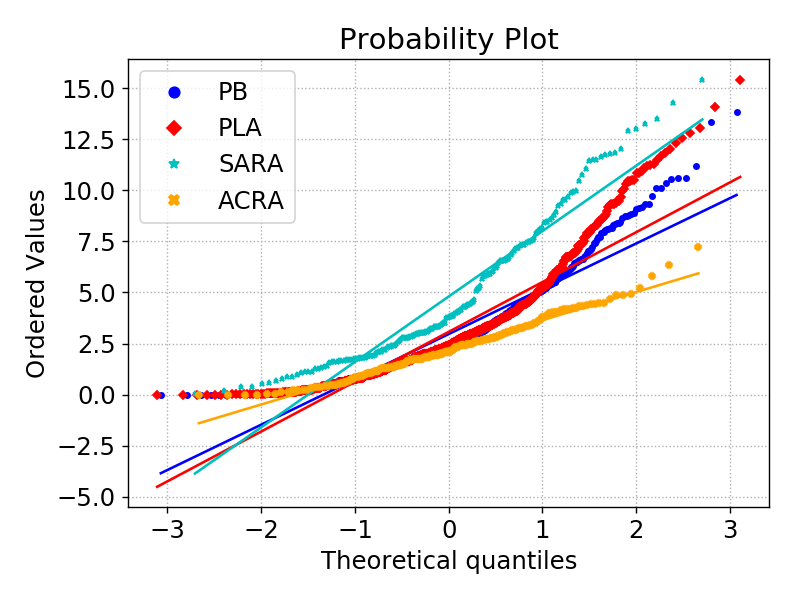

In [13]:
def quantile_plot(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    markersize = 3

    res = stats.probplot(point_avg_PB, plot=plt, fit=False)
    ax.get_lines()[0].set_marker('o')
    ax.get_lines()[0].set_markeredgecolor('b')
    ax.get_lines()[0].set_markerfacecolor('b')
    ax.get_lines()[0].set_markersize(markersize)
    ax.get_lines()[1].set_color('b')

    res = stats.probplot(point_avg_PLA, plot=plt, fit=False)
    ax.get_lines()[2].set_marker('D')
    ax.get_lines()[2].set_markeredgecolor('r')
    ax.get_lines()[2].set_markerfacecolor('r')
    ax.get_lines()[2].set_markersize(markersize)
    ax.get_lines()[3].set_color('r')

    res = stats.probplot(point_avg_SARA, plot=plt, fit=False)
    ax.get_lines()[4].set_marker('*')
    ax.get_lines()[4].set_markeredgecolor('c')
    ax.get_lines()[4].set_markerfacecolor('c')
    ax.get_lines()[4].set_markersize(markersize)
    ax.get_lines()[5].set_color('c')

    res = stats.probplot(point_avg_ACRA, plot=plt, fit=False)
    ax.get_lines()[6].set_marker('X')
    ax.get_lines()[6].set_markeredgecolor('orange')
    ax.get_lines()[6].set_markerfacecolor('orange')
    ax.get_lines()[6].set_markersize(markersize)
    ax.get_lines()[7].set_color('orange')

    plt.legend(handles=[ax.get_lines()[0],
                        ax.get_lines()[2],
                        ax.get_lines()[4],
                        ax.get_lines()[6]], labels=['PB', 'PLA', 'SARA', 'ACRA'], markerscale=2)
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

quantile_plot(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA)


## P-P Plot

<IPython.core.display.Javascript object>


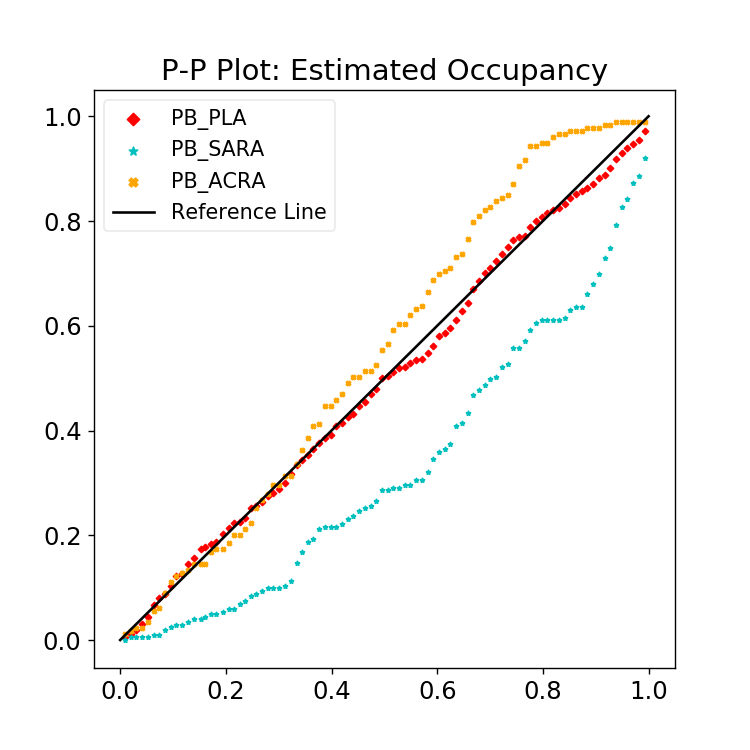

In [55]:
def pp_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA, title='Estimated Occupancy'):
    # Pick bins
    bins = 100
    
    boundaries = sorted(point_avg_PB)[::round(len(point_avg_PB)/bins)+1]
    labels = [(boundaries[i]+boundaries[i+1])/2 for i in range(len(boundaries)-1)]

    # Bin two series into equal bins
    PB_b = pd.cut(point_avg_PB, bins=boundaries, labels=labels,duplicates='drop')
    PLA_b = pd.cut(point_avg_PLA, bins=boundaries, labels=labels,duplicates='drop')
    SARA_b = pd.cut(point_avg_SARA, bins=boundaries, labels=labels,duplicates='drop')
    ACRA_b = pd.cut(point_avg_ACRA, bins=boundaries, labels=labels,duplicates='drop')
    
    # Get value counts for each bin and sort by bin
    PB_hist = PB_b.value_counts().sort_index(ascending=True)/len(PB_b)
    PLA_hist = PLA_b.value_counts().sort_index(ascending=True)/len(PLA_b)
    SARA_hist = SARA_b.value_counts().sort_index(ascending=True)/len(SARA_b)
    ACRA_hist = ACRA_b.value_counts().sort_index(ascending=True)/len(ACRA_b)

    # Make cumulative
    for ser in [PB_hist, PLA_hist,SARA_hist,ACRA_hist]:
        ttl = 0
        for idx, val in ser.iteritems():
            ttl += val
            ser.loc[idx] = ttl

    # Plot it
    fig, ax = plt.subplots(figsize=(6,6))
    handle_PB_PLA = ax.scatter(PB_hist, PLA_hist,c='r', marker='D', s = 6)
    handle_PB_SARA = ax.scatter(PB_hist, SARA_hist,c='c', marker='*', s = 6)
    handle_PB_ACRA = ax.scatter(PB_hist, ACRA_hist,c='orange', marker='X', s = 6)
    
    handle_reference_line, = ax.plot([0,1],[0,1],'k-')
    
    ax.legend(handles=[handle_PB_PLA, handle_PB_SARA, handle_PB_ACRA, handle_reference_line], 
               labels=['PB_PLA', 'PB_SARA', 'PB_ACRA', 'Reference Line'],
              fontsize=12, markerscale=2, framealpha=0.4)
    
    ax.set_title('P-P Plot: {}'.format(title))
    plt.show()

pp_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA, title='Estimated Occupancy')
    

## Q-Q Plot
qqplot only works on datasets with the same size.

In [15]:
# print(point_avg_PB.shape)
# print(point_avg_PLA.shape)

# pp_x = sm.ProbPlot(point_avg_PB, fit=True)
# pp_y = sm.ProbPlot(point_avg_PLA, fit=True)

# # # probability of exceedance
# # fig2 = pp_x.probplot(exceed=True)

# # compare x quantiles to y quantiles
# fig3 = pp_x.qqplot(other=pp_y, line='45')

# # # same as above with probabilities/percentiles
# # fig4 = pp_x.ppplot(other=pp_y, line='45')

In [16]:
np.linspace(0, 100, 101)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [17]:
np.arange(0,101,4)

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100])

https://stackoverflow.com/questions/43285752/python-q-q-and-p-p-plot-of-two-distributions-of-unequal-length

<IPython.core.display.Javascript object>


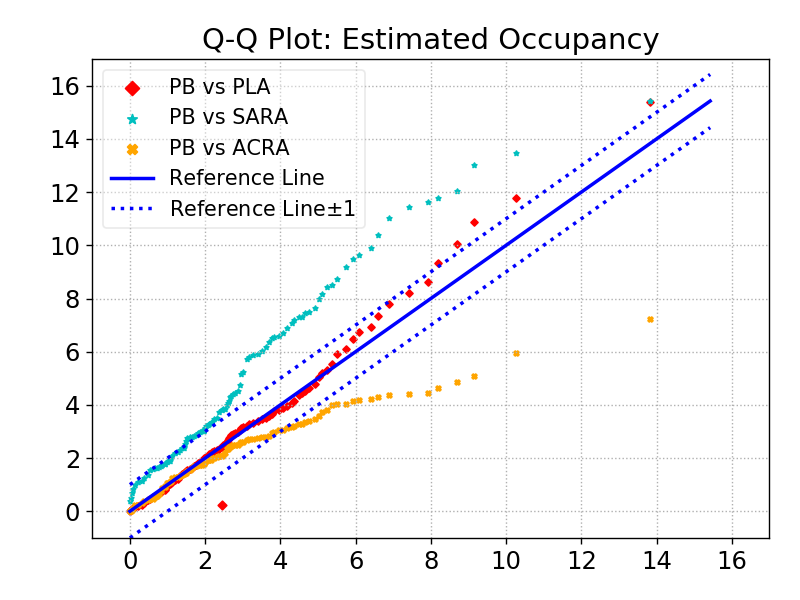

In [34]:
def qq_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA, 
            title='Estimated Occupancy', axis_lim = None, reference_line_boundary =None ):
    q = np.arange(0,101,1)
    quantile_PB = np.percentile(point_avg_PB, q)
    quantile_PLA = np.percentile(point_avg_PLA, q)
    quantile_SARA = np.percentile(point_avg_SARA, q)
    quantile_ACRA = np.percentile(point_avg_ACRA, q)
    
    fig, ax = plt.subplots()
    marker_size = 8
    linewidth = 2
    
    handle_PB_PLA = ax.scatter(quantile_PB, quantile_PLA, 
                               c='r', marker='D', s = marker_size)
#     import pdb; pdb.set_trace()
    handle_PB_PLA_2 = ax.scatter(quantile_PB[50], point_avg_PLA[50], 
                               c='r', marker='D', s = marker_size+4)
    
    handle_PB_SARA = ax.scatter(quantile_PB, quantile_SARA, 
                                c='c', marker='*', s = marker_size)
    handle_PB_ACRA = ax.scatter(quantile_PB, quantile_ACRA, 
                                c='orange', marker='X', s = marker_size)
    
    #Add a reference line
    maxval = max(np.sort(point_avg_PB)[-1],np.sort(point_avg_PLA)[-1],np.sort(point_avg_SARA)[-1],np.sort(point_avg_ACRA)[-1])
    minval = min(np.sort(point_avg_PB)[0],np.sort(point_avg_PLA)[0],np.sort(point_avg_SARA)[0],np.sort(point_avg_ACRA)[0])
    handle_reference_line, = ax.plot([minval,maxval],[minval,maxval],'b-',linewidth=linewidth)
    if reference_line_boundary is not None:
        handle_reference_line_up, = ax.plot([minval,maxval],[minval+reference_line_boundary,maxval+reference_line_boundary],'b:',linewidth=linewidth)
        handle_reference_line_bottom, = ax.plot([minval,maxval],[minval-reference_line_boundary,maxval-reference_line_boundary],'b:',linewidth=linewidth)

        ax.legend(handles=[handle_PB_PLA, handle_PB_SARA, handle_PB_ACRA, 
                           handle_reference_line,handle_reference_line_up], 
                  labels=['PB vs PLA', 'PB vs SARA', 'PB vs ACRA', 
                          'Reference Line', 'Reference Line$\pm$1'],
                  fontsize=12, markerscale=2, framealpha=0.4)
    else:
        ax.legend(handles=[handle_PB_PLA, handle_PB_SARA, handle_PB_ACRA, 
                           handle_reference_line], 
                  labels=['PB vs PLA', 'PB vs SARA', 'PB vs ACRA', 
                          'Reference Line'],
                  fontsize=12, markerscale=2, framealpha=0.4)
    ax.set_title('Q-Q Plot: {}'.format(title))
    plt.tight_layout()
    plt.grid(True, linestyle=':')
    
    if axis_lim is not None:
        ax.set_xlim(axis_lim)
        ax.set_ylim(axis_lim)

qq_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA,
        title='Estimated Occupancy', axis_lim = [-1,17], reference_line_boundary =1)


https://stackoverflow.com/questions/42658252/how-to-create-a-qq-plot-between-two-samples-of-different-size-in-python

In [19]:
print('PB: {}'.format(point_avg_PB.shape))
print('PLA: {}'.format(point_avg_PLA.shape))
print('SARA: {}'.format(point_avg_SARA.shape))
print('ACRA: {}'.format(point_avg_ACRA.shape))

PB: (648,)
PLA: (740,)
SARA: (203,)
ACRA: (179,)


In [20]:
import numpy as np
import pylab

test1 = point_avg_PB
test2 = point_avg_PLA

#Calculate quantiles
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

plt.figure()
#Plot the quantiles to create the qq plot
plt.scatter(quantiles1,quantiles2, c='r', marker='D', s = 6)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
plt.plot([minval,maxval],[minval,maxval],'k-')

plt.show()

<IPython.core.display.Javascript object>

## Average Estimated Occupancy

point_avg_PB  : mean=2.9623371056241425,   std = 2.3251799135356683
point_avg_PLA : mean=3.0708601065423875,   std = 2.61123350214685
point_avg_SARA: mean=4.802318498870223,   std = 3.3076929369259456
point_avg_ACRA: mean=2.2685108427944973,   std = 1.3780730755729484


<IPython.core.display.Javascript object>


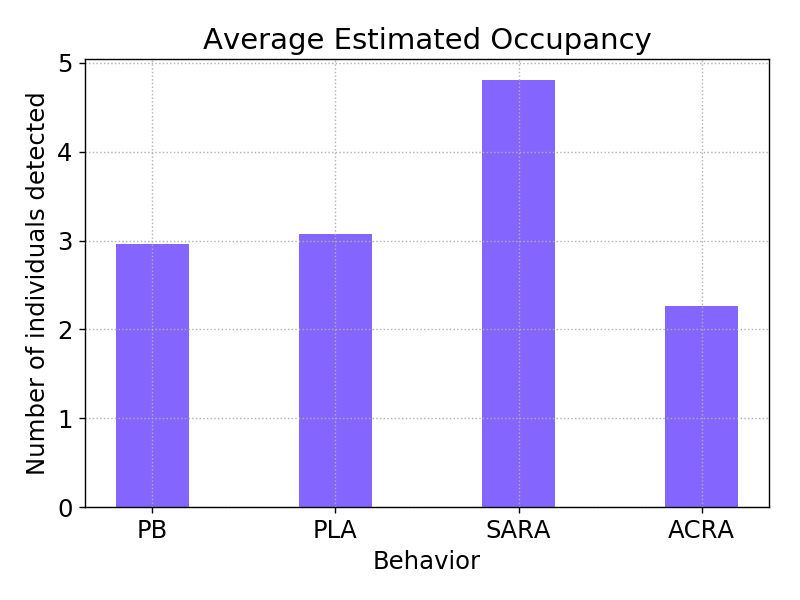

In [21]:
print("point_avg_PB  : mean={},   std = {}".format(point_avg_PB.mean(),point_avg_PB.std()))
print("point_avg_PLA : mean={},   std = {}".format(point_avg_PLA.mean(),point_avg_PLA.std()))
print("point_avg_SARA: mean={},   std = {}".format(point_avg_SARA.mean(),point_avg_SARA.std()))
print("point_avg_ACRA: mean={},   std = {}".format(point_avg_ACRA.mean(),point_avg_ACRA.std()))
average_occupancy_estimate = [point_avg_PB.mean(), point_avg_PLA.mean(), point_avg_SARA.mean(), point_avg_ACRA.mean()]
plt.figure()
plt.bar(np.arange(0,4), average_occupancy_estimate,color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Number of individuals detected')
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Estimated Occupancy')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_of_estimated_occupancy.png', dpi=300)

# Estimated Engagement Level
## Load data.

In [22]:
PB_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/PB_estimated_engagement.csv')
PLA_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/PLA_estimated_engagement.csv')
SARA_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/SARA_estimated_engagement.csv')
ACRA_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/ACRA_estimated_engagement.csv')

PB_estimated_engagement = PB_raw_data['reward_IR_distance'].astype(float).values
PLA_estimated_engagement = PLA_raw_data['reward_IR_distance'].astype(float).values
SARA_estimated_engagement = SARA_raw_data['reward_IR_distance'].astype(float).values
ACRA_estimated_engagement = ACRA_raw_data['reward_IR_distance'].astype(float).values

## Everage over 1 minute.

In [23]:
def average_estimated_engagement(estimated_engagement, avg_point=600):
    point_num = int(np.ceil(len(estimated_engagement)/avg_point))
    point_avg = []
    for i in range(point_num):
        if i == point_num:
            point_avg.append(estimated_engagement[i*avg_point:].mean())
        else:
            point_avg.append(estimated_engagement[i*avg_point: (i+1)*avg_point].mean())
    return np.array(point_avg)

# The estimated engagement based on IR reading at 10Hz
avg_point_over_second = 30

engagement_avg_PB = average_estimated_engagement(PB_estimated_engagement, avg_point=avg_point_over_second*10)
engagement_avg_PLA = average_estimated_engagement(PLA_estimated_engagement, avg_point=avg_point_over_second*10)
engagement_avg_SARA = average_estimated_engagement(SARA_estimated_engagement, avg_point=avg_point_over_second*10)
engagement_avg_ACRA = average_estimated_engagement(ACRA_estimated_engagement, avg_point=avg_point_over_second*10)


In [24]:
estimated_engagement = {'PB': engagement_avg_PB, 
                        'PLA':engagement_avg_PLA, 
                        'SARA':engagement_avg_SARA, 
                        'ACRA':engagement_avg_ACRA}
for i in estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, estimated_engagement[i].mean(), estimated_engagement[i].std()))

estimated_engagement_mean = [estimated_engagement[i].mean() for i in estimated_engagement.keys()]
plt.figure()
plt.bar(np.arange(0,4), estimated_engagement_mean, color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylim(0,0.08)
plt.yticks(np.arange(0, 0.0801, 0.01))
plt.ylabel('Estimated Engagement')
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Estimated Engagement')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_estimated_engagement.png', dpi=300)


PB: mean=0.0419, std=0.0554
PLA: mean=0.0529, std=0.0797
SARA: mean=0.0543, std=0.0671
ACRA: mean=0.0218, std=0.0224


<IPython.core.display.Javascript object>

In [25]:
# Normalized reward
norm_estimated_engagement_PB = PB_estimated_engagement / point_avg_PB.mean()
norm_estimated_engagement_PLA = PLA_estimated_engagement / point_avg_PLA.mean()
norm_estimated_engagement_SARA = SARA_estimated_engagement / point_avg_SARA.mean()
norm_estimated_engagement_ACRA = ACRA_estimated_engagement / point_avg_ACRA.mean()

norm_estimated_engagement = {'PB': norm_estimated_engagement_PB, 
                             'PLA':norm_estimated_engagement_PLA, 
                             'SARA':norm_estimated_engagement_SARA, 
                             'ACRA':norm_estimated_engagement_ACRA}
for i in norm_estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, 
                                                  norm_estimated_engagement[i].mean(), 
                                                  norm_estimated_engagement[i].std()))

norm_estimated_engagement_mean = [norm_estimated_engagement[i].mean() for i in norm_estimated_engagement.keys()]

plt.figure()
plt.bar(np.arange(0,4), norm_estimated_engagement_mean,
        color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Estimated Engagement')
plt.ylim(0, 0.08)
plt.ylim(0, 0.025)
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Normalized Average Estimated Engagement')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Normalized_average_engagement.png', dpi=300)

PB: mean=0.0141, std=0.0305
PLA: mean=0.0172, std=0.0372
SARA: mean=0.0113, std=0.0227
ACRA: mean=0.0097, std=0.0241


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


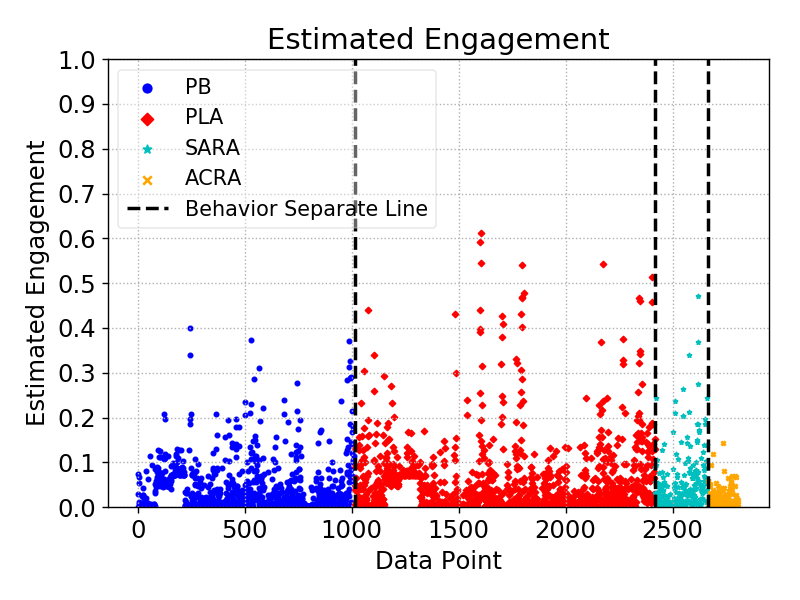

In [26]:
plt.figure()

start_PB = 0
end_PB = len(engagement_avg_PB)
handle_engage_PB = plt.scatter(np.arange(start_PB, end_PB), engagement_avg_PB, c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = start_PLA+len(engagement_avg_PLA)
handle_engage_PLA = plt.scatter(np.arange(start_PLA, end_PLA), engagement_avg_PLA, c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = start_SARA+len(engagement_avg_SARA)
handle_engage_SARA = plt.scatter(np.arange(start_SARA, end_SARA), engagement_avg_SARA, c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = start_ACRA+len(engagement_avg_ACRA)
handle_engage_ACRA = plt.scatter(np.arange(start_ACRA, end_ACRA), engagement_avg_ACRA, c='orange', marker='x', s = 6)
# plt.ylim(0,0.5)

handle_engage_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Estimated Engagement')
plt.xlabel('Data Point')

plt.ylim(0,1)
plt.yticks(np.arange(0,1.001,0.1))
plt.title('Estimated Engagement')
plt.legend(handles=[handle_engage_PB, handle_engage_PLA, handle_engage_SARA, handle_engage_ACRA, handle_engage_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Estimated_engagement_comparison_sparsed_data_point.png', dpi=300)



<IPython.core.display.Javascript object>


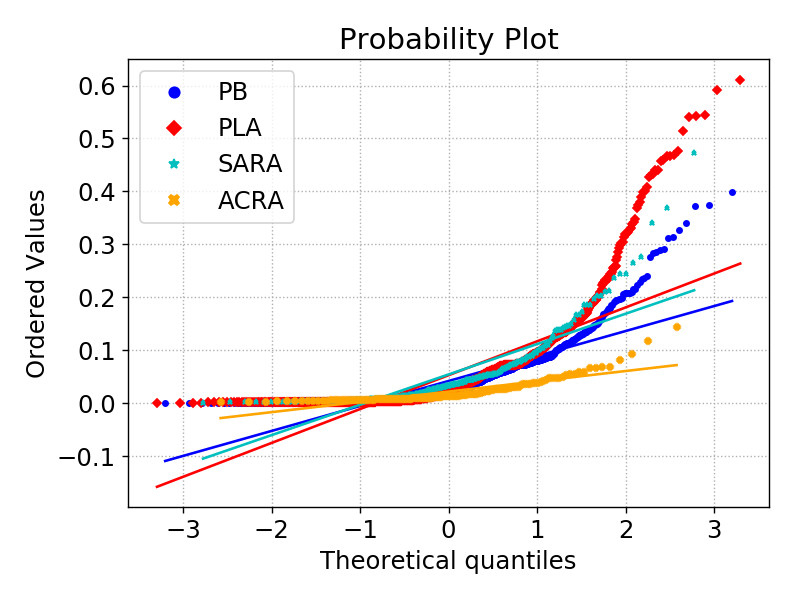

In [27]:
quantile_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA)

## Q-Q Plot

In [35]:
qq_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA,
        title='Estimated Engagement', axis_lim = None)

<IPython.core.display.Javascript object>

## P-P Plot

In [37]:
pp_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA, 
        title='Estimated Engagement')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


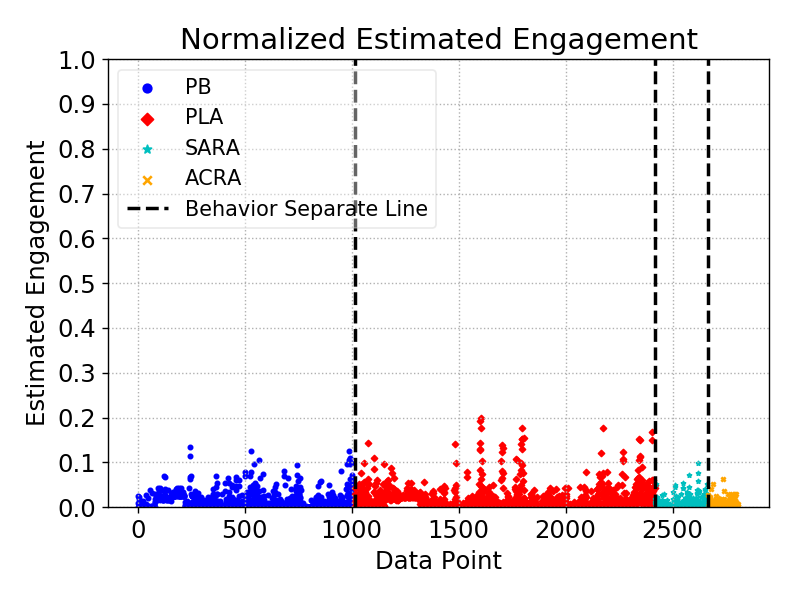

In [39]:
norm_engagement_avg_PB = engagement_avg_PB / point_avg_PB.mean()
norm_engagement_avg_PLA = engagement_avg_PLA / point_avg_PLA.mean()
norm_engagement_avg_SARA = engagement_avg_SARA / point_avg_SARA.mean()
norm_engagement_avg_ACRA = engagement_avg_ACRA / point_avg_ACRA.mean()

plt.figure()

start_PB = 0
end_PB = len(norm_engagement_avg_PB)
handle_engage_PB = plt.scatter(np.arange(start_PB, end_PB), norm_engagement_avg_PB, c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = start_PLA+len(norm_engagement_avg_PLA)
handle_engage_PLA = plt.scatter(np.arange(start_PLA, end_PLA), norm_engagement_avg_PLA, c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = start_SARA+len(norm_engagement_avg_SARA)
handle_engage_SARA = plt.scatter(np.arange(start_SARA, end_SARA), norm_engagement_avg_SARA, c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = start_ACRA+len(norm_engagement_avg_ACRA)
handle_engage_ACRA = plt.scatter(np.arange(start_ACRA, end_ACRA), norm_engagement_avg_ACRA, c='orange', marker='x', s = 6)
# plt.ylim(0,0.5)

handle_engage_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Estimated Engagement')
plt.xlabel('Data Point')

plt.ylim(0,1)
plt.yticks(np.arange(0,1.001,0.1))
plt.title('Normalized Estimated Engagement')
plt.legend(handles=[handle_engage_PB, handle_engage_PLA, handle_engage_SARA, handle_engage_ACRA, handle_engage_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Normalized_Estimated_engagement_comparison_sparsed_data_point.png', dpi=300)



In [40]:
quantile_plot(norm_engagement_avg_PB, norm_engagement_avg_PLA, 
              norm_engagement_avg_SARA, norm_engagement_avg_ACRA)

<IPython.core.display.Javascript object>

## Q-Q Plot

<IPython.core.display.Javascript object>


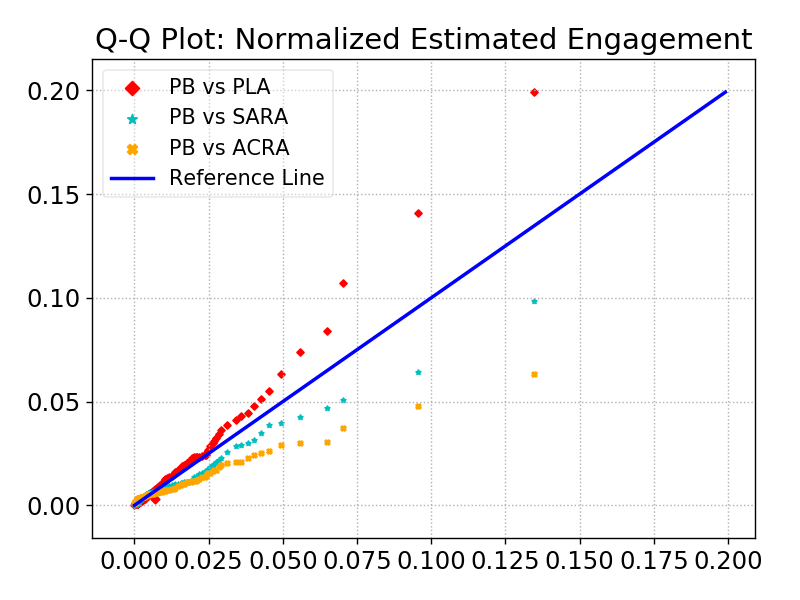

In [42]:
qq_plot(norm_engagement_avg_PB, norm_engagement_avg_PLA, 
        norm_engagement_avg_SARA, norm_engagement_avg_ACRA,
        title='Normalized Estimated Engagement', axis_lim = None)

## P-P Plot

<IPython.core.display.Javascript object>


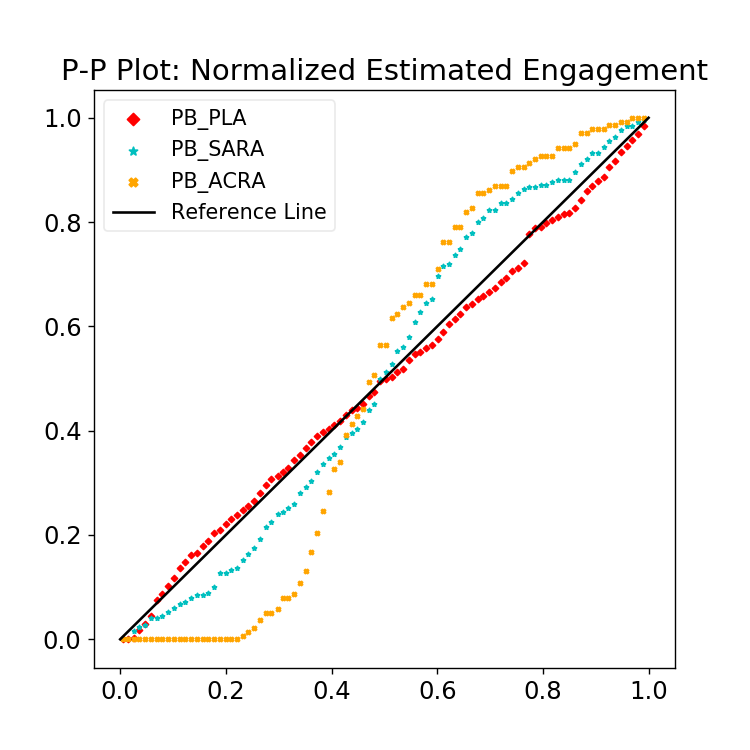

In [43]:
pp_plot(norm_engagement_avg_PB, norm_engagement_avg_PLA, 
        norm_engagement_avg_SARA, norm_engagement_avg_ACRA, 'Normalized Estimated Engagement')

## 1-way ANOVA

In [44]:
f_value, p_value = stats.f_oneway(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=12.3344, p_value=0.0000


## Kruskal-Wallis H-test for independent samples

In [45]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=23.0453, p_value=0.0000


## t-test
standard t-test

In [46]:
from scipy import stats
t_PB_PLA, p_PB_PLA = stats.ttest_ind(engagement_avg_PB, engagement_avg_PLA)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(engagement_avg_PB, engagement_avg_SARA)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(engagement_avg_PB, engagement_avg_ACRA)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(engagement_avg_PLA, engagement_avg_SARA)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(engagement_avg_PLA, engagement_avg_ACRA)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(engagement_avg_SARA, engagement_avg_ACRA)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-3.7748, p_PB_PLA=0.0002
t_PB_SARA=-3.0278, p_PB_SARA=0.0025
t_PB_ACRA=4.2014, p_PB_ACRA=0.0000
t_PLA_SARA=-0.2636, p_PLA_SARA=0.7921
t_PLA_ACRA=4.5513, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


Welch’s t-test, which does not assume equal population variance

In [47]:
from scipy import stats
t_PB_PLA, p_PB_PLA = stats.ttest_ind(engagement_avg_PB, engagement_avg_PLA, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(engagement_avg_PB, engagement_avg_SARA, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(engagement_avg_PB, engagement_avg_ACRA, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(engagement_avg_PLA, engagement_avg_SARA, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(engagement_avg_PLA, engagement_avg_ACRA, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(engagement_avg_SARA, engagement_avg_ACRA, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-3.9935, p_PB_PLA=0.0001
t_PB_SARA=-2.6948, p_PB_SARA=0.0074
t_PB_ACRA=7.7501, p_PB_ACRA=0.0000
t_PLA_SARA=-0.2966, p_PLA_SARA=0.7669
t_PLA_ACRA=10.8402, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


ks-test

In [48]:
KS_PB_PLA, p_PB_PLA = stats.ks_2samp(engagement_avg_PB, engagement_avg_PLA)
KS_PB_SARA, p_PB_SARA = stats.ks_2samp(engagement_avg_PB, engagement_avg_SARA)
KS_PB_ACRA, p_PB_ACRA =stats.ks_2samp(engagement_avg_PB, engagement_avg_ACRA)
KS_PLA_SARA, p_PLA_SARA =stats.ks_2samp(engagement_avg_PLA, engagement_avg_SARA)
KS_PLA_ACRA, p_PLA_ACRA = stats.ks_2samp(engagement_avg_PLA, engagement_avg_ACRA)
KS_SARA_ACRA, p_SARA_ACRA =stats.ks_2samp(engagement_avg_SARA, engagement_avg_ACRA)
print('KS_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(KS_PB_PLA, p_PB_PLA*2))
print('KS_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(KS_PB_SARA, p_PB_SARA*2))
print('KS_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(KS_PB_ACRA, p_PB_ACRA*2))
print('KS_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(KS_PLA_SARA, p_PLA_SARA*2))
print('KS_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(KS_PLA_ACRA, p_PLA_ACRA*2))
print('KS_SARA_ACRA={0:.4f}, p_SARA_ACRA={1:.4f}'.format(KS_SARA_ACRA, p_SARA_ACRA*2))

KS_PB_PLA=0.0613, p_PB_PLA=0.0461
KS_PB_SARA=0.1851, p_PB_SARA=0.0000
KS_PB_ACRA=0.2329, p_PB_ACRA=0.0000
KS_PLA_SARA=0.1899, p_PLA_SARA=0.0000
KS_PLA_ACRA=0.2687, p_PLA_ACRA=0.0000
KS_SARA_ACRA=0.3129, p_SARA_ACRA=0.0000


# Active Interaction

In [49]:
with open('./cleaned_active_interaction_data/PB_active_interaction.pickle', 'rb') as handle:
    PB_data = pickle.load(handle)
    
with open('./cleaned_active_interaction_data/PLA_active_interaction.pickle', 'rb') as handle:
    PLA_data = pickle.load(handle)

with open('./cleaned_active_interaction_data/SARA_active_interaction.pickle', 'rb') as handle:
    SARA_data = pickle.load(handle)

with open('./cleaned_active_interaction_data/ACRA_active_interaction.pickle', 'rb') as handle:
    ACRA_data = pickle.load(handle)


In [50]:
def add_explanatory_variable_columns(data, 
                                     behavior_mode='PB', 
                                     time_window=5,
                                     IR_reading_based_counting = False,
                                     active_interaction_reward_threshold=0.5,
                                     active_interaction_IR_threshold=0.1):
    """
    Add date code, time code, behavior code for each row.
    
    Args:
        data (dict):
            data['data']:
            data['separate_line']:
            data['date']:
        behavior_mode (str):
            1. 'PB'
            2. 'PLA'
            3. 'SARA'
            4. 'ACRA'
        time_window (int): minutes
        IR_reading_based_counting (bool): default = False
            if True, based on IR reading; Otherwise, based on reward.
        active_interaction_reward_threshold (float): default=0.5,
        active_interaction_IR_threshold  (float): default=0.1
    """
    date_code = {'2018-09-14':5,
                 '2018-09-17':1, '2018-09-18':2, '2018-09-19':3, '2018-09-20':4, '2018-09-21':5,
                 '2018-09-24':1, '2018-09-25':2, '2018-09-26':3, '2018-09-27':4, '2018-09-28':5,
                 '2018-10-02':2, '2018-10-03':3, '2018-10-05':5}
#     date_code = {'2018-09-14':0,
#                  '2018-09-17':1, '2018-09-18':2, '2018-09-19':3, '2018-09-20':4, '2018-09-21':5,
#                  '2018-09-24':6, '2018-09-25':7, '2018-09-26':8, '2018-09-27':9, '2018-09-28':10,
#                  '2018-10-02':11, '2018-10-03':12, '2018-10-05':13}
    time_code = {'1': ['13:00:00', '13:29:59'],
                 '2': ['13:30:00', '13:59:59'],
                 '3': ['14:00:00', '14:29:59'],
                 '4': ['14:30:00', '14:59:59'],
                 '5': ['15:00:00', '15:29:59'], 
                 '6': ['15:30:00', '15:59:59']}
    behavior_code = {'PB': 0, 'PLA': 1, 'SARA': 2, 'ACRA': 3}
    
    explanatory_vars = {'behavior_code':[], 
                        'date_code':[], 
                        'time_code':[], 
                        'active_interaction_count':[],
                        'total_interaction_count':[],
                        'date':[]}
    # datetime format
    datetime_format = '%Y-%m-%d %H:%M:%S.%f'
    
    day_separate_line = list(data['separate_line'])
    day_separate_line.insert(0, 0)
    day_num = len(day_separate_line)-1
    print('Behavior: {}, total_days={}'.format(behavior_mode, day_num))
    
    for day_i in range(day_num):
        # get start and end index of a day
        day_start_index = day_separate_line[day_i]
        day_end_index = day_separate_line[day_i+1]-1
        #print('day {}: day_start_index={}, day_end_index={}'.format(day_i+1, day_start_index, day_end_index))
        
        # get start and end time of a day
        day_start_time = datetime.strptime(data['data'].iloc[day_start_index]['timestamp'], datetime_format)
        day_end_time = datetime.strptime(data['data'].iloc[day_end_index]['timestamp'], datetime_format)
        print('day {}: day_start_time={}, day_end_time={}'.format(day_i+1, day_start_time, day_end_time))
        
        # get time window
        stop_time_series = []
        for i in range(day_start_index, day_end_index):
            sensor_reading = data['data'].iloc[i]
            time = datetime.strptime(sensor_reading['timestamp'], datetime_format)
            if i == day_start_index:
                stop_time = time+timedelta(minutes=time_window-1, seconds=59)
                #print('stop_time={}'.format(stop_time.strftime("%Y-%m-%d %H:%M:%S.%f")))
                stop_time_series.append(stop_time)
            elif time >= stop_time_series[len(stop_time_series)-1]:
                stop_time = time+timedelta(minutes=time_window)
                if stop_time>day_end_time:
                    stop_time = day_end_time
                #print('stop_time={}'.format(stop_time.strftime("%Y-%m-%d %H:%M:%S.%f")))
                stop_time_series.append(stop_time)
        
        # count within a time window
        active_interaction_count = 0
        total_interaction_count = 0
        time_window_count = 0
        for i in range(day_start_index, day_end_index+1):
            
            sensor_reading = data['data'].iloc[i]
            time = datetime.strptime(sensor_reading['timestamp'], datetime_format) 
#             import pdb
#             pdb.set_trace()
            
            if time <= stop_time_series[time_window_count]:
                if IR_reading_based_counting == True:
                    for IR in sensor_reading.index[1:25]:
                        if sensor_reading[IR] >= active_interaction_IR_threshold:
                            active_interaction_count += 1
                    total_interaction_count += 1
                else:
                    if sensor_reading['reward_IR_distance'] >= active_interaction_reward_threshold:
                        active_interaction_count += 1
                    total_interaction_count += 1
            
            if time > stop_time_series[time_window_count] or time == day_end_time:
                #i = i-1
                sensor_reading = data['data'].iloc[i-1]
                time = datetime.strptime(sensor_reading['timestamp'], datetime_format)
                #print('stop_time_series[time_window_count]={}, time={}'.format(stop_time_series[time_window_count], time))
                
                bc_tmp = behavior_code[behavior_mode]
                dc_tmp = date_code[time.strftime("%Y-%m-%d")]
                tc_tmp = -1
                for k in time_code.keys():
                    if time_code[k][0]<=time.strftime("%H:%M:%S") and time.strftime("%H:%M:%S")<=time_code[k][1]:
                        tc_tmp = int(k)
                if tc_tmp == -1:
                    print('No time code for {}'.format(time))
                
                explanatory_vars['behavior_code'].append(bc_tmp)
                explanatory_vars['date_code'].append(dc_tmp)
                explanatory_vars['time_code'].append(tc_tmp)
                explanatory_vars['date'].append(time.strftime("%Y-%m-%d"))

                explanatory_vars['active_interaction_count'].append(active_interaction_count)
                explanatory_vars['total_interaction_count'].append(total_interaction_count)
                
                # reset
                time_window_count = time_window_count+1
                active_interaction_count = 0
                total_interaction_count = 0
    
    return pd.DataFrame(explanatory_vars)


time_window=1 # minutes
IR_reading_based_counting = True#True#False
active_interaction_reward_threshold=0.5
# IR range [10cm, 80cm] is converted into [1, 0]
#     0.25 corresponds to about closer than 62.5cm.
#     0.5 corresponds to about colser than 55 cm.
#     0.75 corresponds to about closer than 27.5cm.
active_interaction_IR_threshold = 0.25#0.2

add_explanatory_variables_PB = add_explanatory_variable_columns(PB_data, 
                                                                'PB', 
                                                                time_window, 
                                                                IR_reading_based_counting,
                                                                active_interaction_reward_threshold,
                                                                active_interaction_IR_threshold)
add_explanatory_variables_PLA = add_explanatory_variable_columns(PLA_data,
                                                                 'PLA', 
                                                                 time_window, 
                                                                 IR_reading_based_counting,
                                                                 active_interaction_reward_threshold,
                                                                 active_interaction_IR_threshold)

add_explanatory_variables_SARA = add_explanatory_variable_columns(SARA_data,
                                                                 'SARA', 
                                                                 time_window, 
                                                                 IR_reading_based_counting,
                                                                 active_interaction_reward_threshold,
                                                                 active_interaction_IR_threshold)

add_explanatory_variables_ACRA = add_explanatory_variable_columns(ACRA_data,
                                                                 'ACRA', 
                                                                 time_window, 
                                                                 IR_reading_based_counting,
                                                                 active_interaction_reward_threshold,
                                                                 active_interaction_IR_threshold)


Behavior: PB, total_days=14
day 1: day_start_time=2018-09-14 14:30:00.071998, day_end_time=2018-09-14 15:59:59.899390
day 2: day_start_time=2018-09-17 15:00:00.072148, day_end_time=2018-09-17 15:59:59.867383
day 3: day_start_time=2018-09-18 14:30:00.047061, day_end_time=2018-09-18 15:59:59.982582
day 4: day_start_time=2018-09-19 14:30:00.013349, day_end_time=2018-09-19 15:59:59.932554
day 5: day_start_time=2018-09-20 13:02:22.916799, day_end_time=2018-09-20 13:59:59.794765
day 6: day_start_time=2018-09-21 14:00:00.074933, day_end_time=2018-09-21 14:59:59.969794
day 7: day_start_time=2018-09-24 14:00:02.075400, day_end_time=2018-09-24 14:59:59.777977
day 8: day_start_time=2018-09-25 13:00:00.008425, day_end_time=2018-09-25 13:59:59.850318
day 9: day_start_time=2018-09-26 14:00:00.082711, day_end_time=2018-09-26 14:59:59.854474
day 10: day_start_time=2018-09-27 13:00:00.046482, day_end_time=2018-09-27 13:59:59.954526
day 11: day_start_time=2018-09-28 13:00:00.038597, day_end_time=2018-09

## Without delete zero

<IPython.core.display.Javascript object>


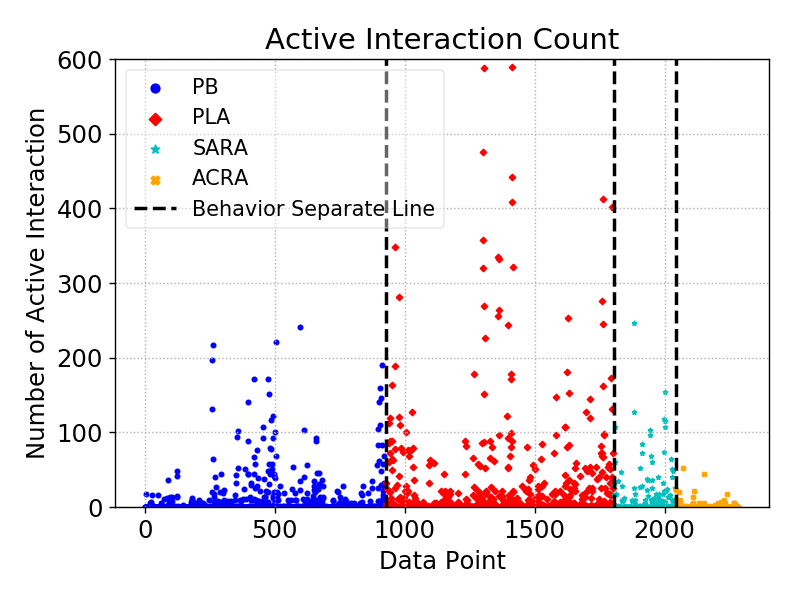

In [51]:
# divide by 10 to reduce sample frequency to 1hz and make the value more reasonable
norm_hz = 1#10
active_interaction_PB = add_explanatory_variables_PB['active_interaction_count'] / norm_hz
active_interaction_PLA = add_explanatory_variables_PLA['active_interaction_count'] / norm_hz
active_interaction_SARA = add_explanatory_variables_SARA['active_interaction_count'] / norm_hz
active_interaction_ACRA = add_explanatory_variables_ACRA['active_interaction_count'] / norm_hz

activate_interaction_datapoint_ylim = 600
activate_interaction_average_ylim = 100

# Y_PB_PLA
# separate_line_PB_PLA
# Y_SARA_ACRA
# separate_line_SARA_ACRA

plt.figure()

start_PB = 0
end_PB = len(active_interaction_PB)
handle_PB = plt.scatter(range(start_PB, end_PB), active_interaction_PB, c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = end_PB + len(active_interaction_PLA)
handle_PLA = plt.scatter(range(start_PLA, end_PLA), active_interaction_PLA, c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = end_PLA + len(active_interaction_SARA)
handle_SARA = plt.scatter(range(start_SARA,end_SARA), active_interaction_SARA, c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = end_SARA + len(active_interaction_ACRA)
handle_ACRA = plt.scatter(range(start_ACRA,end_ACRA), active_interaction_ACRA, c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of Active Interaction')
plt.xlabel('Data Point')

# plt.ylim(0,1700)
plt.ylim(0,activate_interaction_datapoint_ylim)
plt.title('Active Interaction Count')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Active_Interaction_Count.png', dpi=300)


<IPython.core.display.Javascript object>


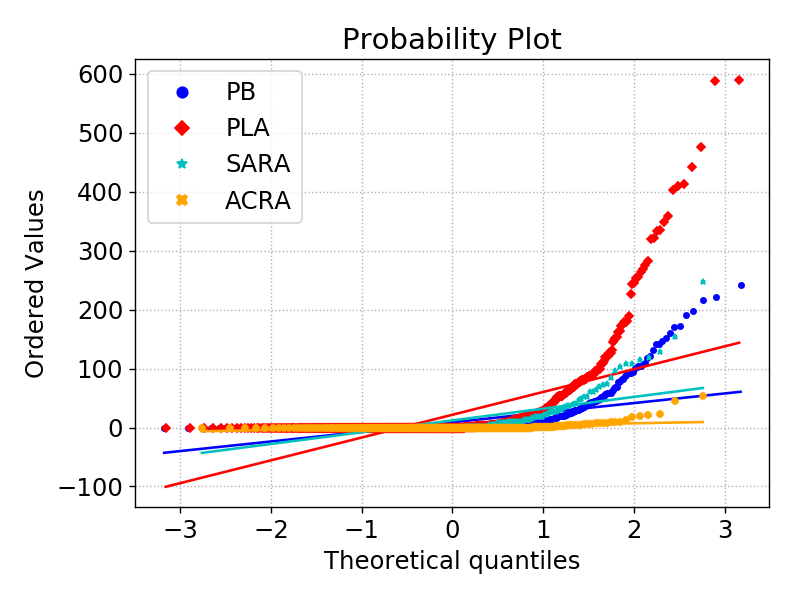

In [52]:
quantile_plot(active_interaction_PB, active_interaction_PLA, 
              active_interaction_SARA, active_interaction_ACRA)

## Q-Q Plot

<IPython.core.display.Javascript object>


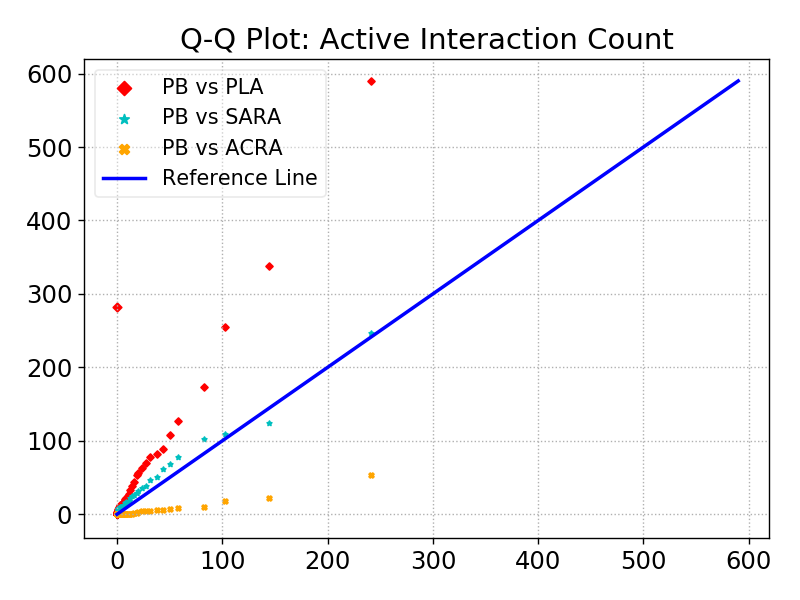

In [53]:
qq_plot(active_interaction_PB, active_interaction_PLA, 
        active_interaction_SARA, active_interaction_ACRA,
        title='Active Interaction Count', axis_lim = None)

## P-P Plot

In [73]:
# pp_plot(active_interaction_PB, active_interaction_PLA, 
#         active_interaction_SARA, active_interaction_ACRA, 'Active Interaction')

## Delete zero

In [57]:

active_interaction_PB_delete_zero = np.delete(active_interaction_PB.values, 
                                              np.where(active_interaction_PB.values == 0), axis=0)

active_interaction_PLA_delete_zero = np.delete(active_interaction_PLA.values, 
                                               np.where(active_interaction_PLA.values == 0), axis=0)

active_interaction_SARA_delete_zero = np.delete(active_interaction_SARA.values, 
                                                np.where(active_interaction_SARA.values == 0), axis=0)

active_interaction_ACRA_delete_zero = np.delete(active_interaction_ACRA.values, 
                                                np.where(active_interaction_ACRA.values == 0), axis=0)

plt.figure()

start_PB = 0
end_PB = len(active_interaction_PB_delete_zero)
handle_PB = plt.scatter(range(start_PB, end_PB), active_interaction_PB_delete_zero, c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = end_PB + len(active_interaction_PLA_delete_zero)
handle_PLA = plt.scatter(range(start_PLA, end_PLA), active_interaction_PLA_delete_zero, c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = end_PLA + len(active_interaction_SARA_delete_zero)
handle_SARA = plt.scatter(range(start_SARA,end_SARA), active_interaction_SARA_delete_zero, c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = end_SARA + len(active_interaction_ACRA_delete_zero)
handle_ACRA = plt.scatter(range(start_ACRA,end_ACRA), active_interaction_ACRA_delete_zero, c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of Active Interaction')
plt.xlabel('Data Point')

# plt.ylim(0,1700)
plt.ylim(0,activate_interaction_datapoint_ylim)
plt.title('Active Interaction Count')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Active_Interaction_Count.png', dpi=300)


C:\Users\pc-admin\AppData\Local\conda\conda\envs\tf_gpu\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

In [58]:
quantile_plot(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero, 
              active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero)

<IPython.core.display.Javascript object>

In [59]:
qq_plot(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero, 
              active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero)

<IPython.core.display.Javascript object>

## Normalized by occupancy

In [60]:


plt.figure()

start_PB = 0
end_PB = len(active_interaction_PB_delete_zero)
handle_PB = plt.scatter(range(start_PB, end_PB), active_interaction_PB_delete_zero/ point_avg_PB.mean(), c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = end_PB + len(active_interaction_PLA_delete_zero)
handle_PLA = plt.scatter(range(start_PLA, end_PLA), active_interaction_PLA_delete_zero/ point_avg_PLA.mean(), c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = end_PLA + len(active_interaction_SARA_delete_zero)
handle_SARA = plt.scatter(range(start_SARA,end_SARA), active_interaction_SARA_delete_zero/ point_avg_SARA.mean(), c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = end_SARA + len(active_interaction_ACRA_delete_zero)
handle_ACRA = plt.scatter(range(start_ACRA,end_ACRA), active_interaction_ACRA_delete_zero/ point_avg_ACRA.mean(), c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of Active Interaction')
plt.xlabel('Data Point')

# plt.ylim(0,1700)
plt.ylim(0,activate_interaction_datapoint_ylim)
plt.title('Normalized Active Interaction Count')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Normalized_Active_Interaction_Count.png', dpi=300)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


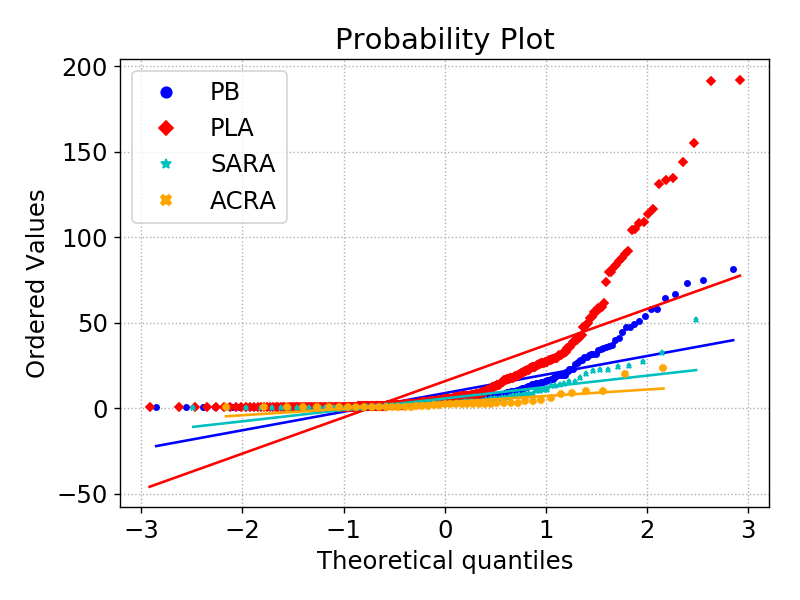

In [61]:
quantile_plot(active_interaction_PB_delete_zero / point_avg_PB.mean(), 
              active_interaction_PLA_delete_zero / point_avg_PLA.mean(), 
              active_interaction_SARA_delete_zero / point_avg_SARA.mean(), 
              active_interaction_ACRA_delete_zero / point_avg_ACRA.mean())

In [62]:
qq_plot(active_interaction_PB_delete_zero / point_avg_PB.mean(), 
              active_interaction_PLA_delete_zero / point_avg_PLA.mean(), 
              active_interaction_SARA_delete_zero / point_avg_SARA.mean(), 
              active_interaction_ACRA_delete_zero / point_avg_ACRA.mean())

<IPython.core.display.Javascript object>

## 1-way ANOVA

In [63]:
f_value, p_value = stats.f_oneway(active_interaction_PB_delete_zero, 
                                  active_interaction_PLA_delete_zero, 
                                  active_interaction_SARA_delete_zero, 
                                  active_interaction_ACRA_delete_zero)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=10.8787, p_value=0.0000


## Kruskal-Wallis H-test for independent samples

In [64]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(active_interaction_PB_delete_zero, 
                                                    active_interaction_PLA_delete_zero, 
                                                    active_interaction_SARA_delete_zero, 
                                                    active_interaction_ACRA_delete_zero)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=32.8445, p_value=0.0000


## t-test

In [65]:
from scipy import stats

t_PB_PLA, p_PB_PLA = stats.ttest_ind(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(active_interaction_PB_delete_zero, active_interaction_SARA_delete_zero)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(active_interaction_PB_delete_zero, active_interaction_ACRA_delete_zero)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(active_interaction_PLA_delete_zero, active_interaction_SARA_delete_zero)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(active_interaction_PLA_delete_zero, active_interaction_ACRA_delete_zero)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-4.2710, p_PB_PLA=0.0000
t_PB_SARA=-0.2411, p_PB_SARA=0.8096
t_PB_ACRA=3.0423, p_PB_ACRA=0.0025
t_PLA_SARA=2.4850, p_PLA_SARA=0.0133
t_PLA_ACRA=3.1655, p_PLA_ACRA=0.0017
t_SARA_ACRA=0.0012, t_SARA_ACRA=0.0012


In [66]:
from scipy import stats

t_PB_PLA, p_PB_PLA = stats.ttest_ind(active_interaction_PB_delete_zero, 
                                     active_interaction_PLA_delete_zero, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(active_interaction_PB_delete_zero, 
                                       active_interaction_SARA_delete_zero, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(active_interaction_PB_delete_zero, 
                                      active_interaction_ACRA_delete_zero, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(active_interaction_PLA_delete_zero, 
                                        active_interaction_SARA_delete_zero, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(active_interaction_PLA_delete_zero, 
                                         active_interaction_ACRA_delete_zero, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(active_interaction_SARA_delete_zero, 
                                          active_interaction_ACRA_delete_zero, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-4.5699, p_PB_PLA=0.0000
t_PB_SARA=-0.2451, p_PB_SARA=0.8066
t_PB_ACRA=6.6452, p_PB_ACRA=0.0000
t_PLA_SARA=3.7015, p_PLA_SARA=0.0002
t_PLA_ACRA=8.8043, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


In [67]:
t_PB_PLA, p_PB_PLA = stats.ks_2samp(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero)
t_PB_SARA, p_PB_SARA = stats.ks_2samp(active_interaction_PB_delete_zero, active_interaction_SARA_delete_zero)
t_PB_ACRA, p_PB_ACRA =stats.ks_2samp(active_interaction_PB_delete_zero, active_interaction_ACRA_delete_zero)
t_PLA_SARA, p_PLA_SARA =stats.ks_2samp(active_interaction_PLA_delete_zero, active_interaction_SARA_delete_zero)
t_PLA_ACRA, p_PLA_ACRA = stats.ks_2samp(active_interaction_PLA_delete_zero, active_interaction_ACRA_delete_zero)
t_SARA_ACRA, t_SARA_ACRA =stats.ks_2samp(active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero)
print('KS_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('KS_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('KS_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('KS_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('KS_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('KS_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


KS_PB_PLA=0.1319, p_PB_PLA=0.0039
KS_PB_SARA=0.0652, p_PB_SARA=0.8749
KS_PB_ACRA=0.3797, p_PB_ACRA=0.0000
KS_PLA_SARA=0.1195, p_PLA_SARA=0.1685
KS_PLA_ACRA=0.4206, p_PLA_ACRA=0.0000
KS_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


In [68]:
active_interaction = [active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero, 
                       active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero]

plt.figure()
plt.rcParams.update({'font.size': 14})
plt.boxplot(active_interaction, meanline=True)
plt.xticks(np.arange(0,6), ['','PB', 'PLA', 'SARA', 'ACRA'])
plt.ylim(0,activate_interaction_datapoint_ylim)
plt.ylabel('Active interaction count')
plt.xlabel('Behavior')
plt.title('Distribution of Active Interaction Count')
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Distribution_of_active_interaction.png', dpi=300)



<IPython.core.display.Javascript object>

In [69]:
active_interaction = [active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero, 
                       active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero]
behavior_name = ['PB', 'PLA', 'SARA', 'ACRA']
for i in range(4):
    mean = active_interaction[i].mean()
    std = active_interaction[i].std()
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(behavior_name[i], mean, std))
    

PB: mean=25.7868, std=40.0871
PLA: mean=48.0685, std=85.7719
SARA: mean=26.8598, std=38.6751
ACRA: mean=7.4667, std=10.5864


<IPython.core.display.Javascript object>


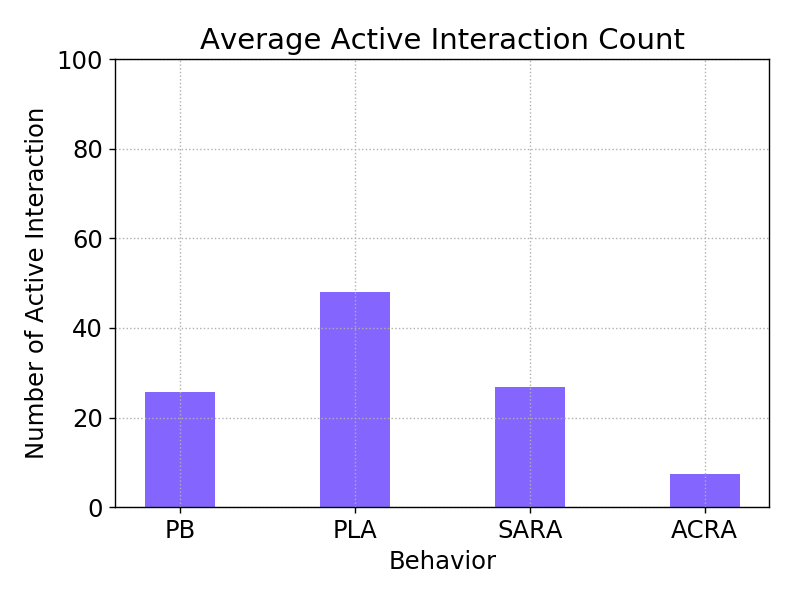

In [70]:
average_active_interaction = [active_interaction_PB_delete_zero.mean(),
                              active_interaction_PLA_delete_zero.mean(),
                              active_interaction_SARA_delete_zero.mean(),
                              active_interaction_ACRA_delete_zero.mean()]

plt.figure()
plt.bar(np.arange(0,4), average_active_interaction, color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Number of Active Interaction')
plt.ylim(0,activate_interaction_average_ylim)
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Active Interaction Count')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_of_Active_Interaction_Count', dpi=300)

<IPython.core.display.Javascript object>


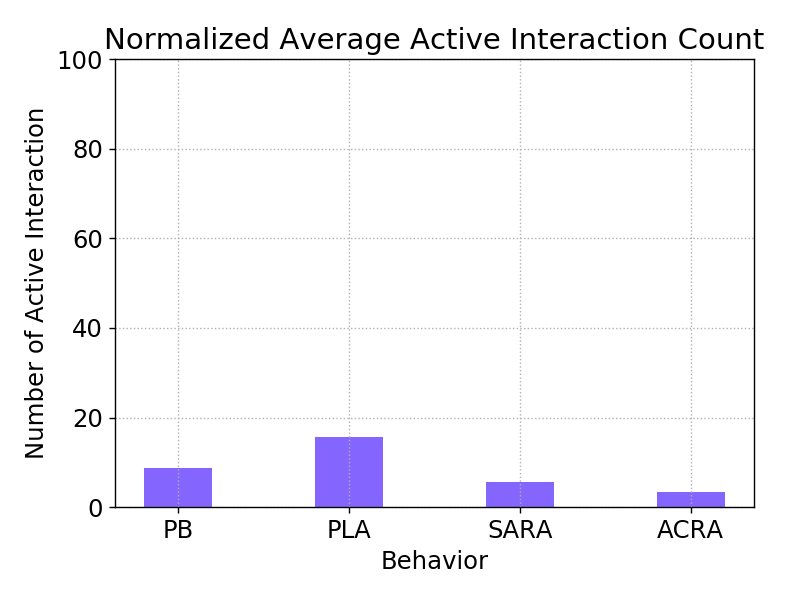

In [71]:
norm_active_interaction_PB_delete_zero = active_interaction_PB_delete_zero/ point_avg_PB.mean()
norm_active_interaction_PLA_delete_zero = active_interaction_PLA_delete_zero/ point_avg_PLA.mean()
norm_active_interaction_SARA_delete_zero = active_interaction_SARA_delete_zero/ point_avg_SARA.mean()
norm_active_interaction_ACRA_delete_zero = active_interaction_ACRA_delete_zero/ point_avg_ACRA.mean()

avrage_norm_active_interaction = [norm_active_interaction_PB_delete_zero.mean(),
                                  norm_active_interaction_PLA_delete_zero.mean(),
                                  norm_active_interaction_SARA_delete_zero.mean(),
                                  norm_active_interaction_ACRA_delete_zero.mean()]

plt.figure()
plt.bar(np.arange(0,4), avrage_norm_active_interaction,
        color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Number of Active Interaction')
plt.ylim(0,activate_interaction_average_ylim)
# plt.ylim(0,25)
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Normalized Average Active Interaction Count')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Normalized_Average_of_Active_Interaction_Count.png', dpi=300)

<IPython.core.display.Javascript object>


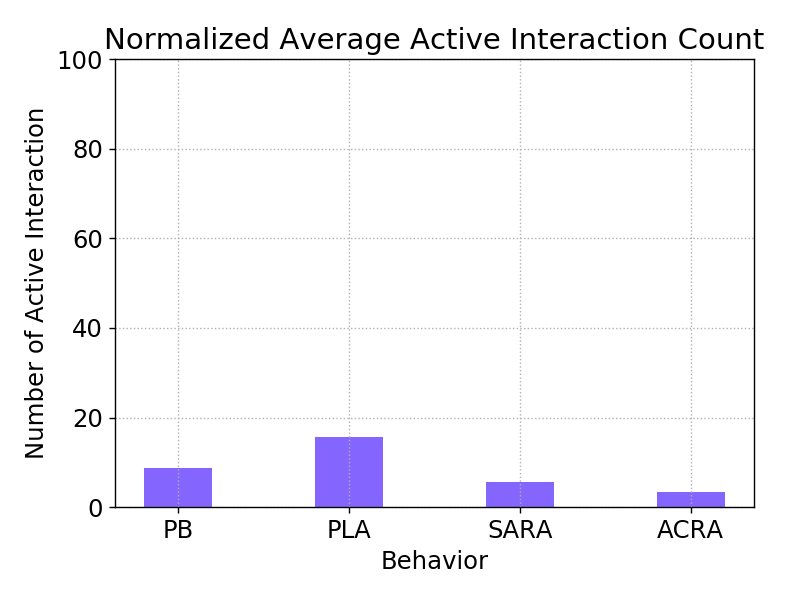

In [72]:
norm_active_interaction_PB_delete_zero = active_interaction_PB_delete_zero/ point_avg_PB.mean()
norm_active_interaction_PLA_delete_zero = active_interaction_PLA_delete_zero/ point_avg_PLA.mean()
norm_active_interaction_SARA_delete_zero = active_interaction_SARA_delete_zero/ point_avg_SARA.mean()
norm_active_interaction_ACRA_delete_zero = active_interaction_ACRA_delete_zero/ point_avg_ACRA.mean()

avrage_norm_active_interaction = [norm_active_interaction_PB_delete_zero.mean(),
                                  norm_active_interaction_PLA_delete_zero.mean(),
                                  norm_active_interaction_SARA_delete_zero.mean(),
                                  norm_active_interaction_ACRA_delete_zero.mean()]

plt.figure()
plt.bar(np.arange(0,4), np.divide(average_active_interaction, average_occupancy_estimate),
        color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Number of Active Interaction')
plt.ylim(0,activate_interaction_average_ylim)
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Normalized Average Active Interaction Count')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Normalized_Average_of_Active_Interaction_Count.png', dpi=300)